In [1]:
import pandas as pd
import scipy as sp
import scipy.stats as stats
import scipy.stats as linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
combined = "output/my_combined.csv"
med = "Resources/medicare_2017.csv"
combined_df = pd.read_csv(combined)
med_df = pd.read_csv(med)
clean_fuse = pd.DataFrame.merge(combined_df, med_df, on=['State', 'County'])
clean_fuse["Medicare Percent"] = ((clean_fuse["Original Medicare"]/clean_fuse["POP2010"])*100).round(2)
clean_fuse["LAPOP1_10 Percent"] = ((clean_fuse["LAPOP1_10"]/clean_fuse["POP2010"])*100).round(2)
clean_fuse["LAPOP05_10 Percent"] = ((clean_fuse["LAPOP05_10"]/clean_fuse["POP2010"])*100).round(2)
clean_fuse["LAPOP1_20 Percent"] = ((clean_fuse["LAPOP1_20"]/clean_fuse["POP2010"])*100).round(2)
clean_fuse["Percent Diabetic"] = ((clean_fuse["# Diabetics"]/clean_fuse["Original Medicare"])*100).round(2)
clean_fuse["Percent Diabetic"] = ((clean_fuse["# Diabetics"]/clean_fuse["Original Medicare"])*100).round(2)
clean_fuse.rename(columns={"% Fair/Poor": "%Fair_or_Poor", "LAPOP1_10 Percent": "LAPOP1_10_Percent", 
                          "LAPOP05_10 Percent": "LAPOP05_10_Percent", "LAPOP1_20 Percent": "LAPOP1_20_Percent", 
                          "Percent Diabetic": "Percent_Diabetic", "Medicare Percent": "Medicare_Percent", 
                          "% Obese": "%Obese"}, inplace = True)
clean_fuse

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Original Medicare,Medicare_Percent,LAPOP1_10_Percent,LAPOP05_10_Percent,LAPOP1_20_Percent,Percent_Diabetic
0,Alabama,Autauga,54571,20221,13.858333,61082.916667,2,2,1,2,...,711.0,145.0,1327.0,19.0,5784,10.60,33.15,55.23,20.28,12.29
1,Alabama,Baldwin,182265,73180,14.358065,60664.935484,3,3,3,2,...,2615.0,415.0,4791.0,20.0,28388,15.58,25.46,39.67,23.86,9.21
2,Alabama,Barbour,27457,9820,24.533333,43123.000000,3,3,1,2,...,525.0,85.0,771.0,45.0,4372,15.92,24.34,33.88,4.31,12.01
3,Alabama,Bibb,22915,7953,16.025000,43362.500000,0,0,0,1,...,333.0,33.0,561.0,29.0,2480,10.82,1.29,1.29,0.00,13.43
4,Alabama,Blount,57322,21578,17.911111,52136.000000,0,0,0,2,...,705.0,123.0,1316.0,22.0,6070,10.59,10.22,12.89,6.80,11.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,Wyoming,Sweetwater,43806,16475,11.841667,81835.083333,0,0,0,2,...,469.0,159.0,1053.0,10.0,5641,12.88,21.46,38.19,20.35,8.31
3090,Wyoming,Teton,21294,8973,8.100000,89555.250000,0,0,0,0,...,104.0,NaN,558.0,8.0,3122,14.66,17.43,18.55,12.23,3.33
3091,Wyoming,Uinta,21118,7668,14.166667,65312.666667,0,0,0,0,...,243.0,8.0,475.0,12.0,2804,13.28,3.59,3.59,0.06,8.67
3092,Wyoming,Washakie,8533,3492,14.133333,62213.666667,0,1,0,0,...,156.0,7.0,174.0,16.0,1812,21.24,12.39,29.74,10.38,8.61


In [3]:
#Change the state and you get the counties for that state

state = clean_fuse.loc[clean_fuse["State"] == "Montana",:]
the_state = state.iat[0,0]
counties = state["County"].tolist()
x_axis = np.arange(len(counties))

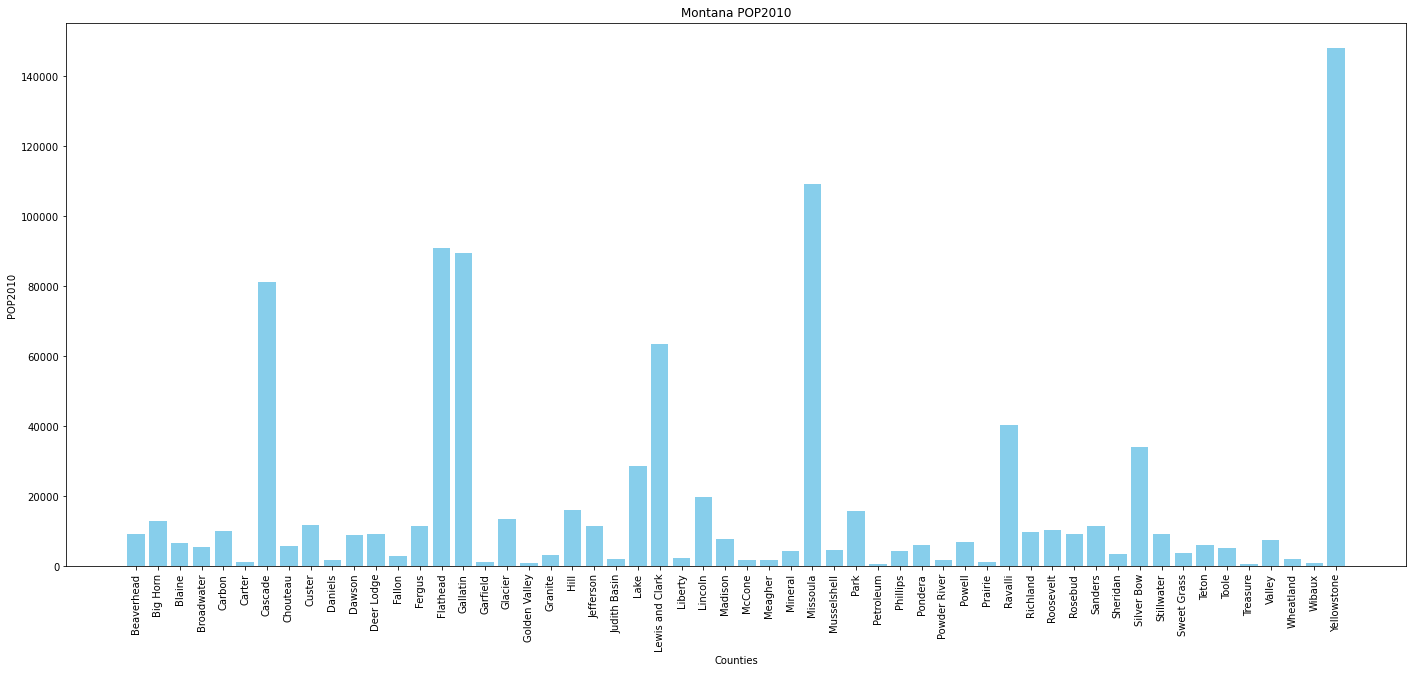

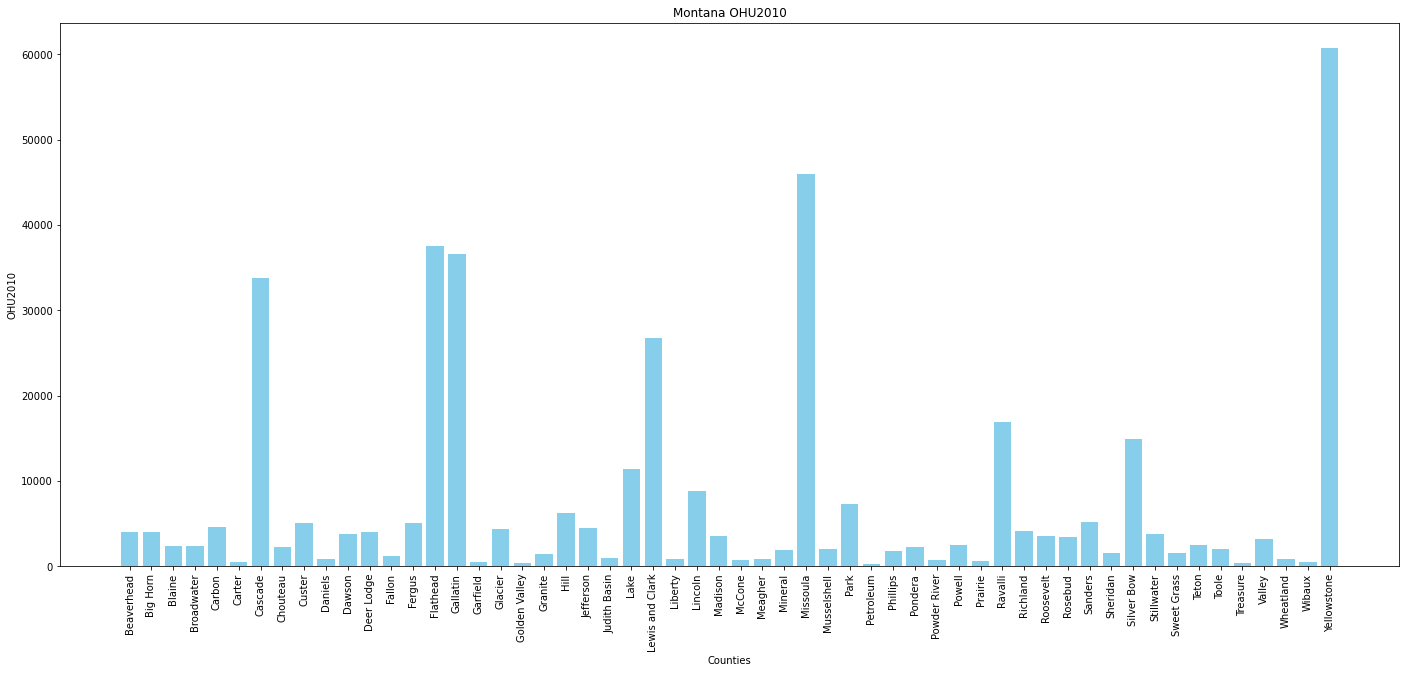

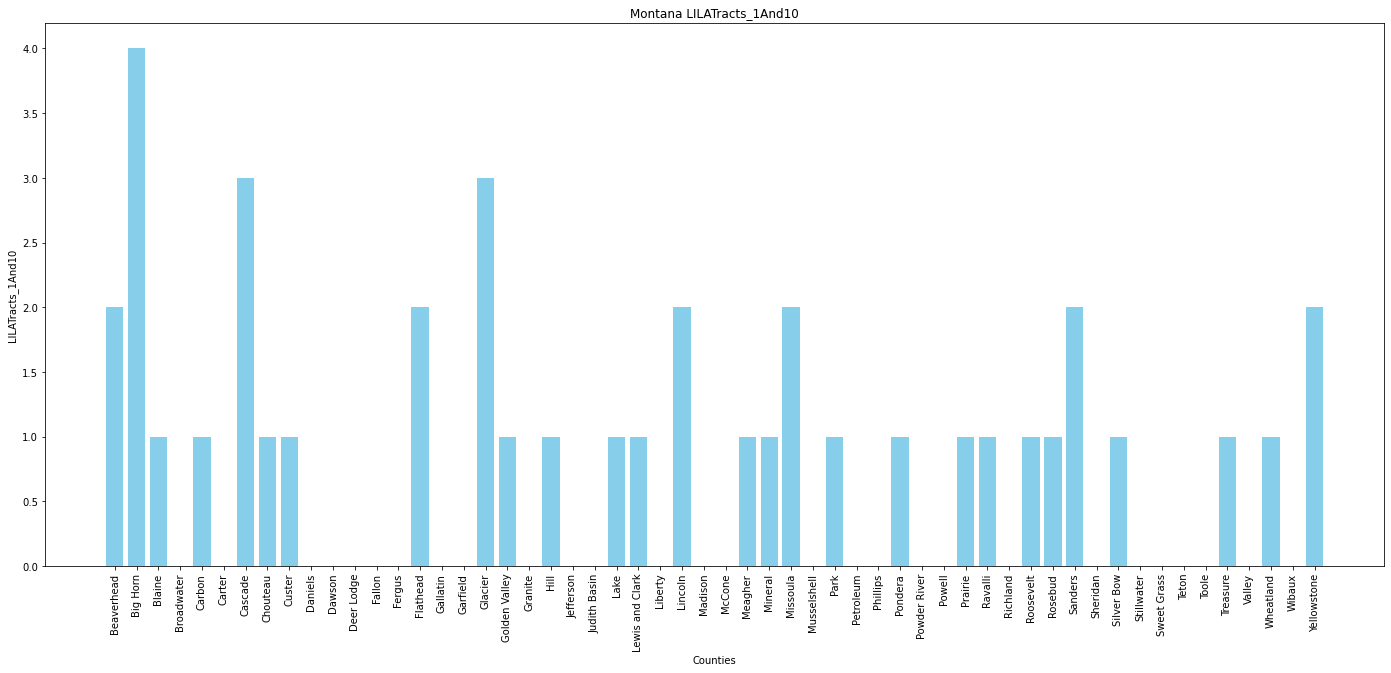

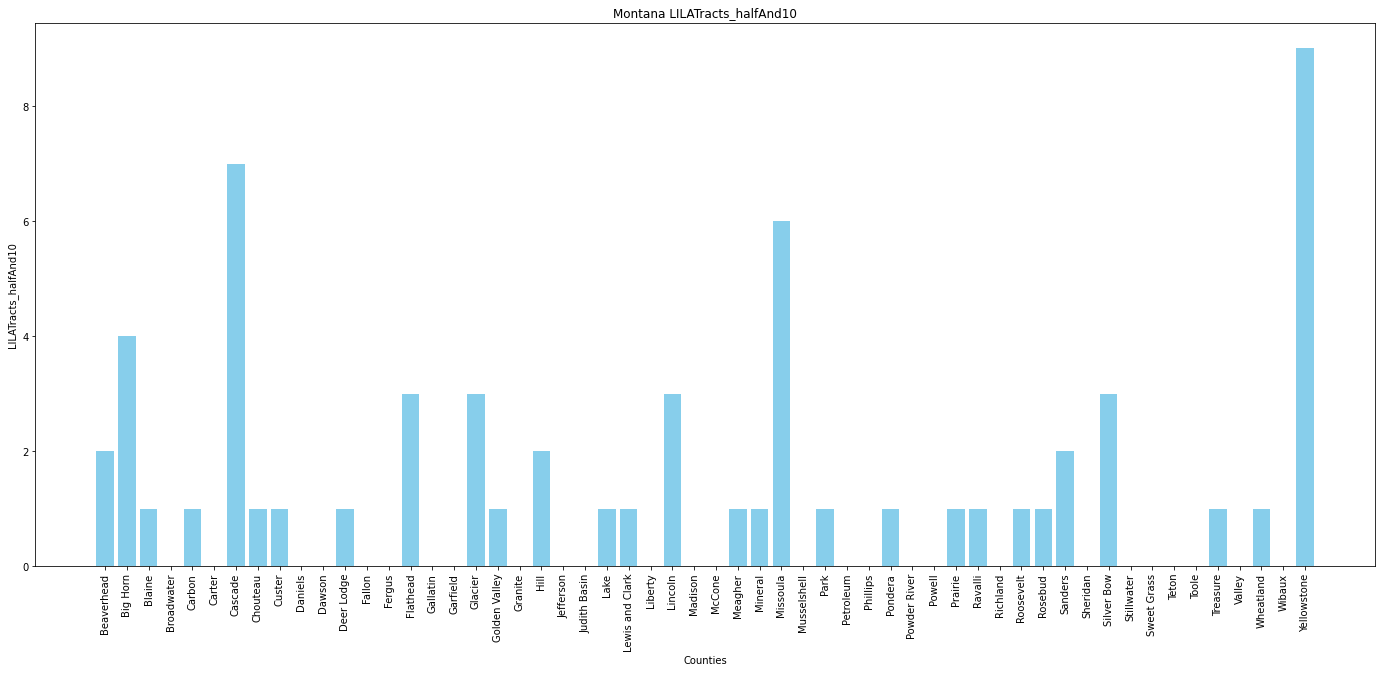

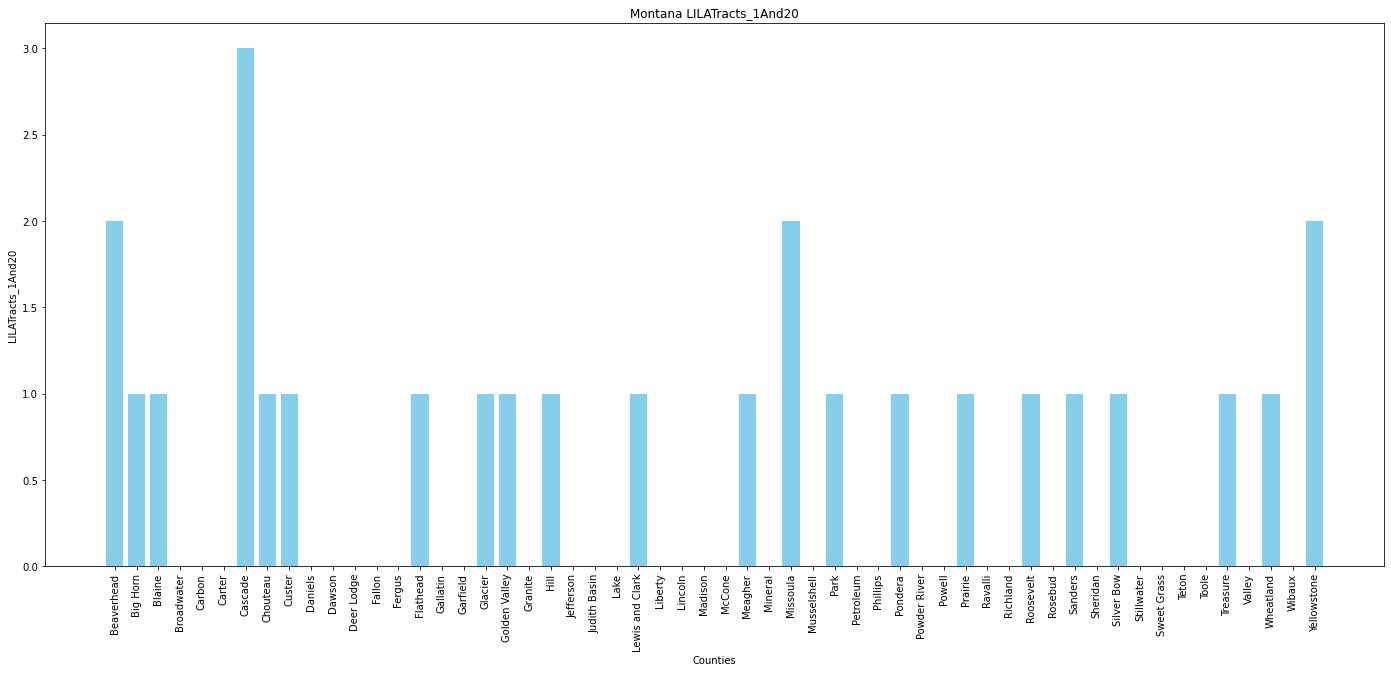

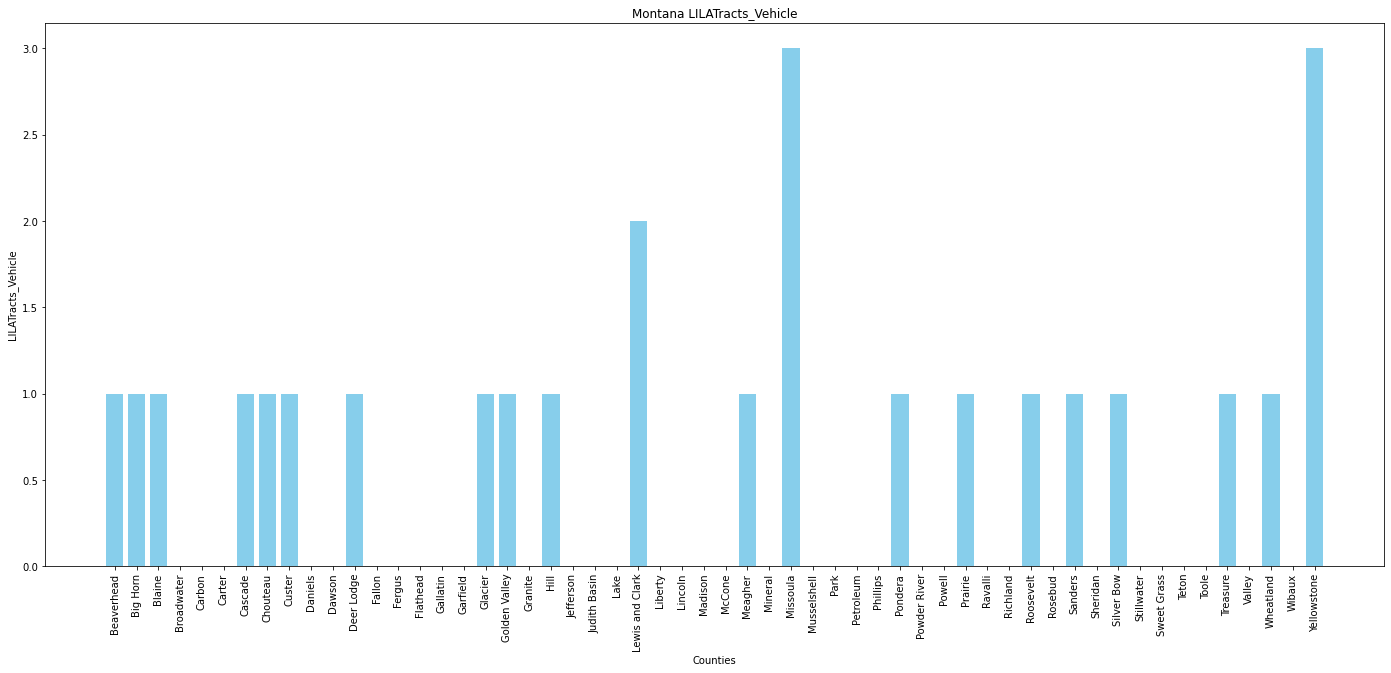

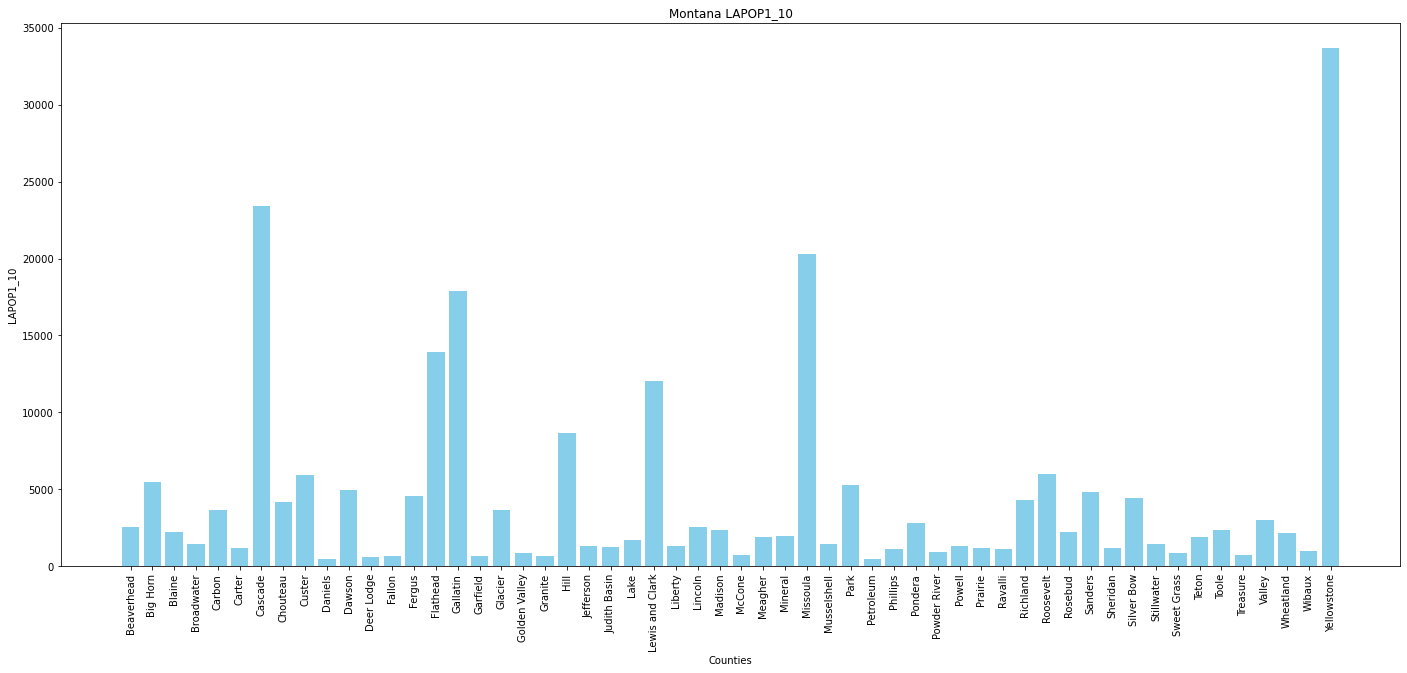

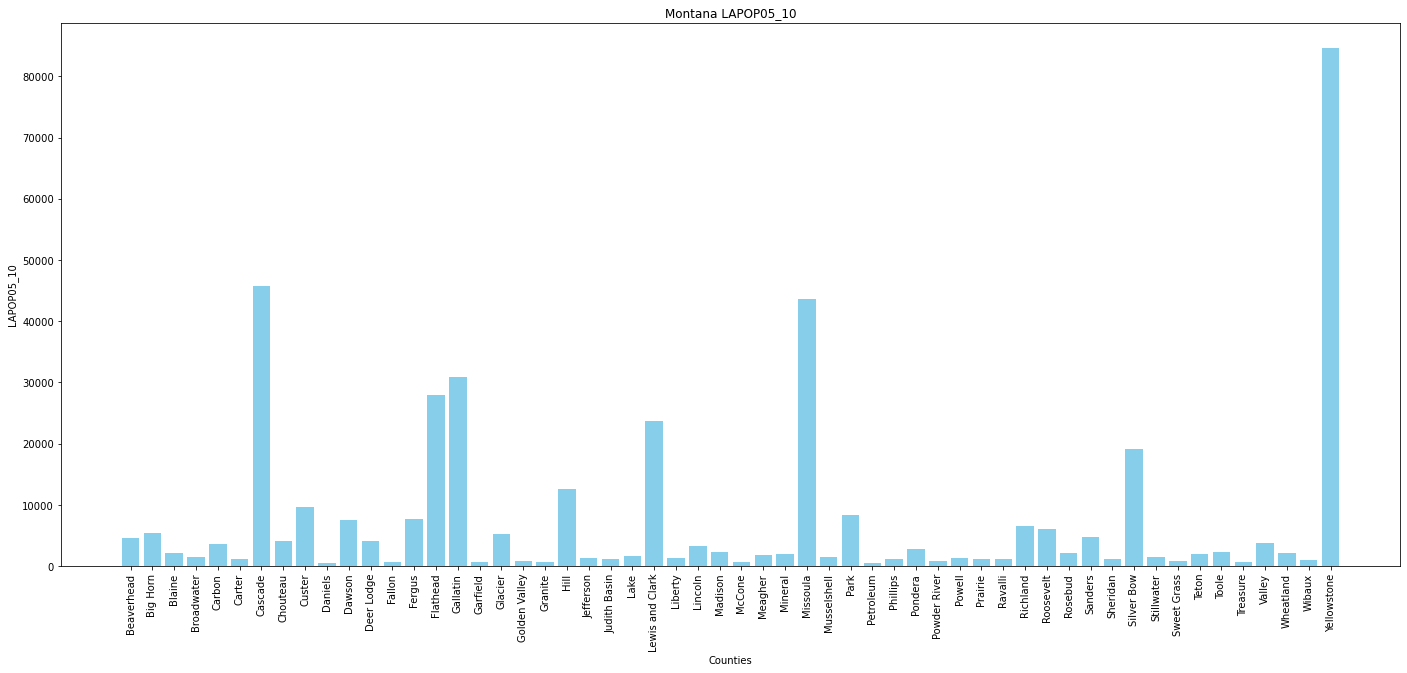

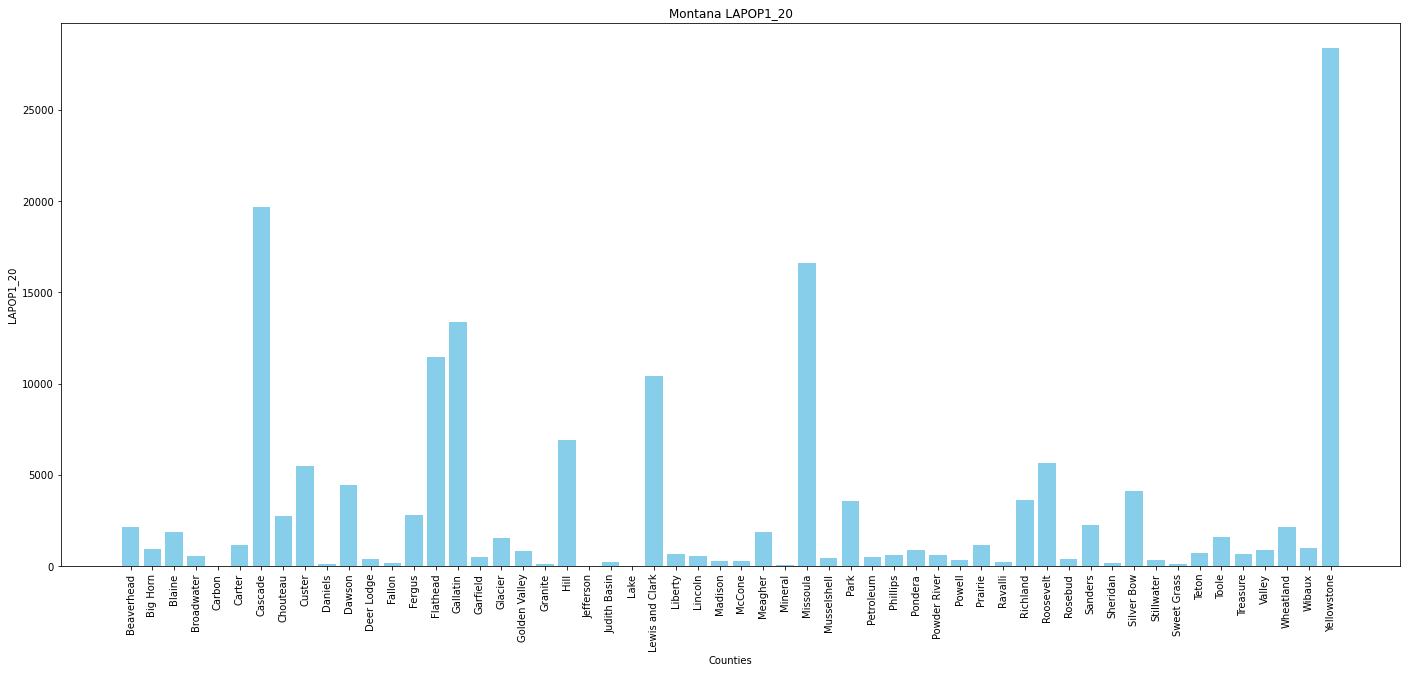

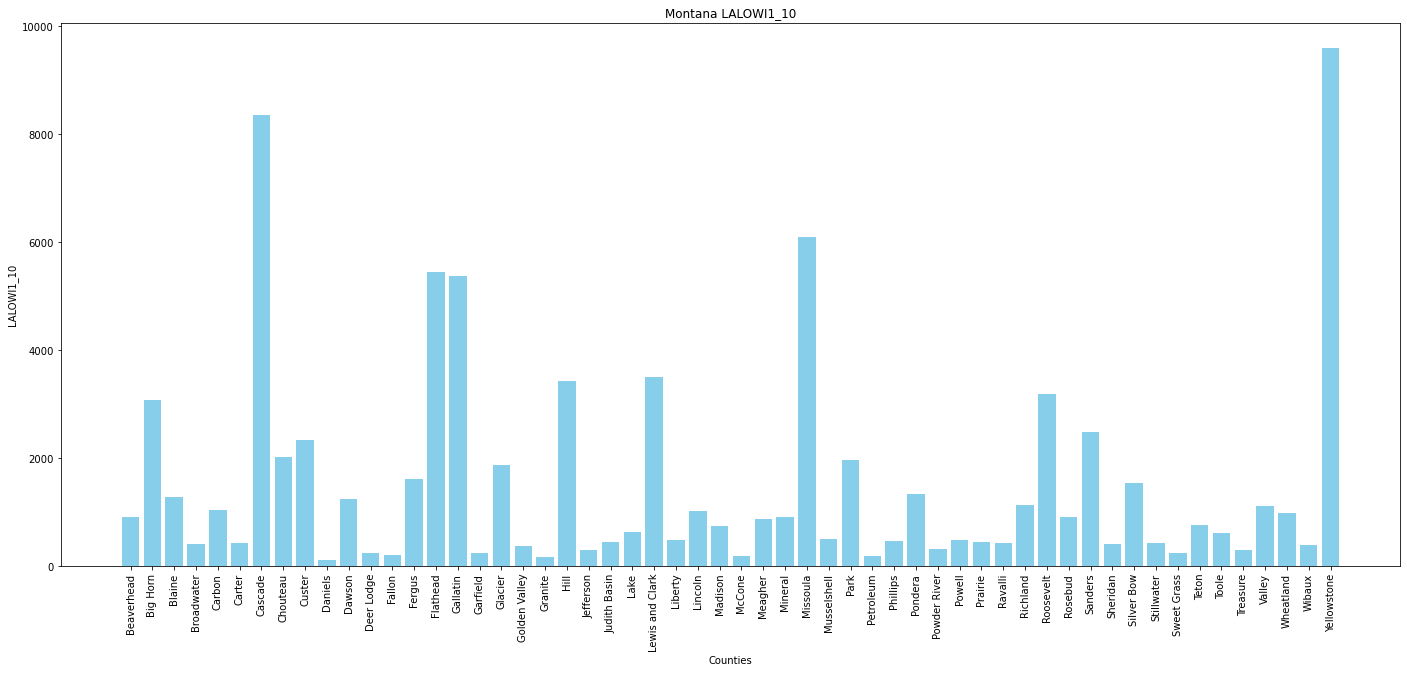

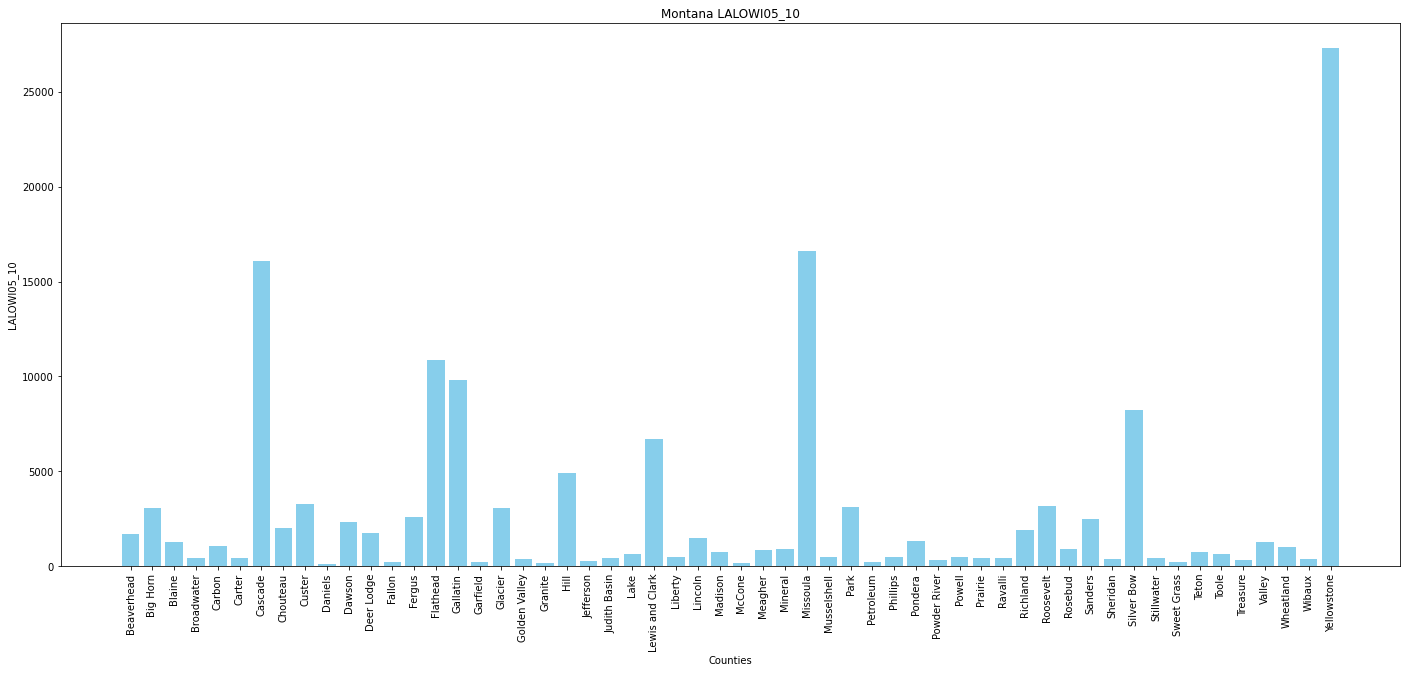

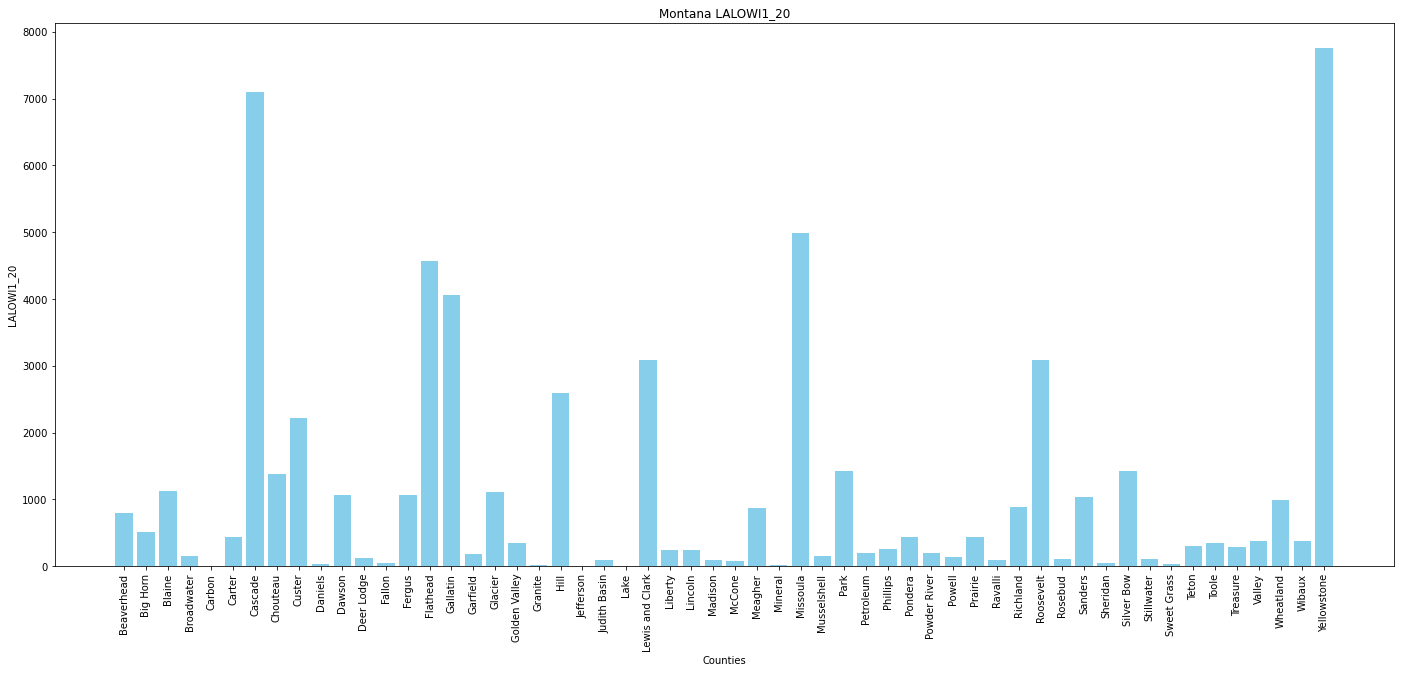

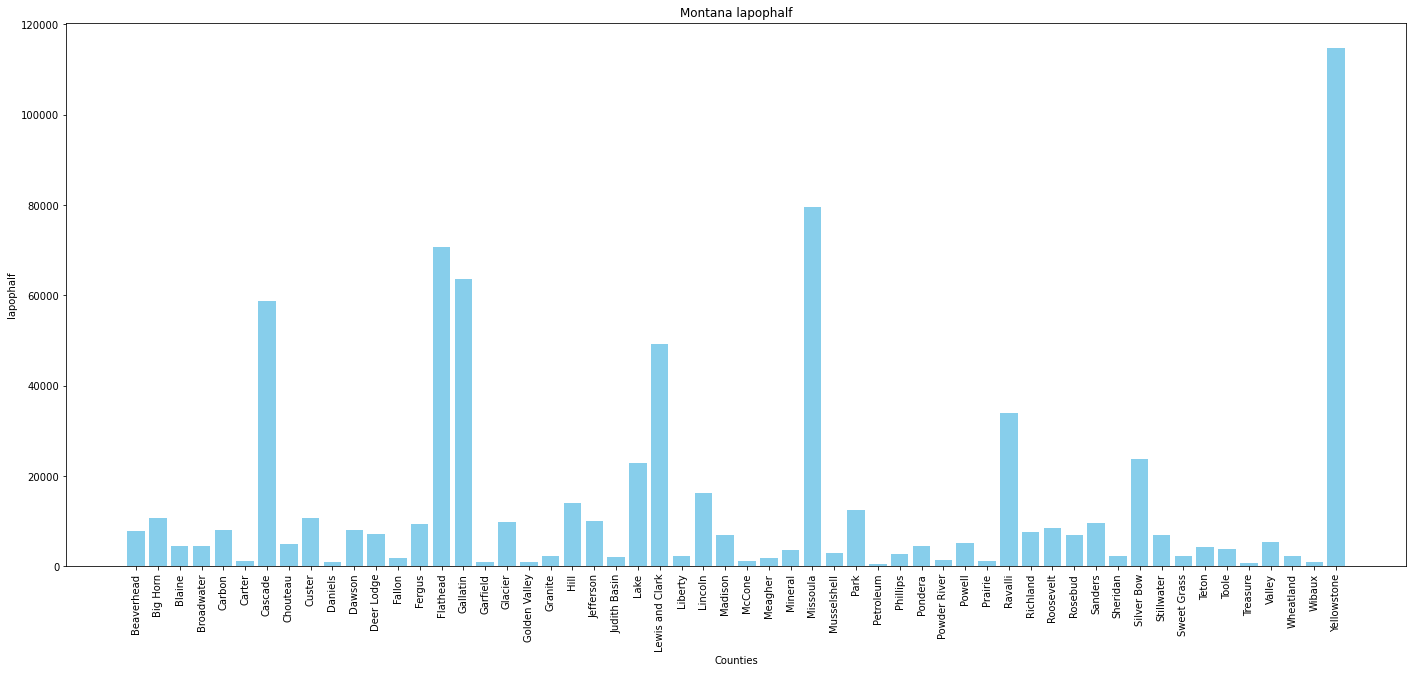

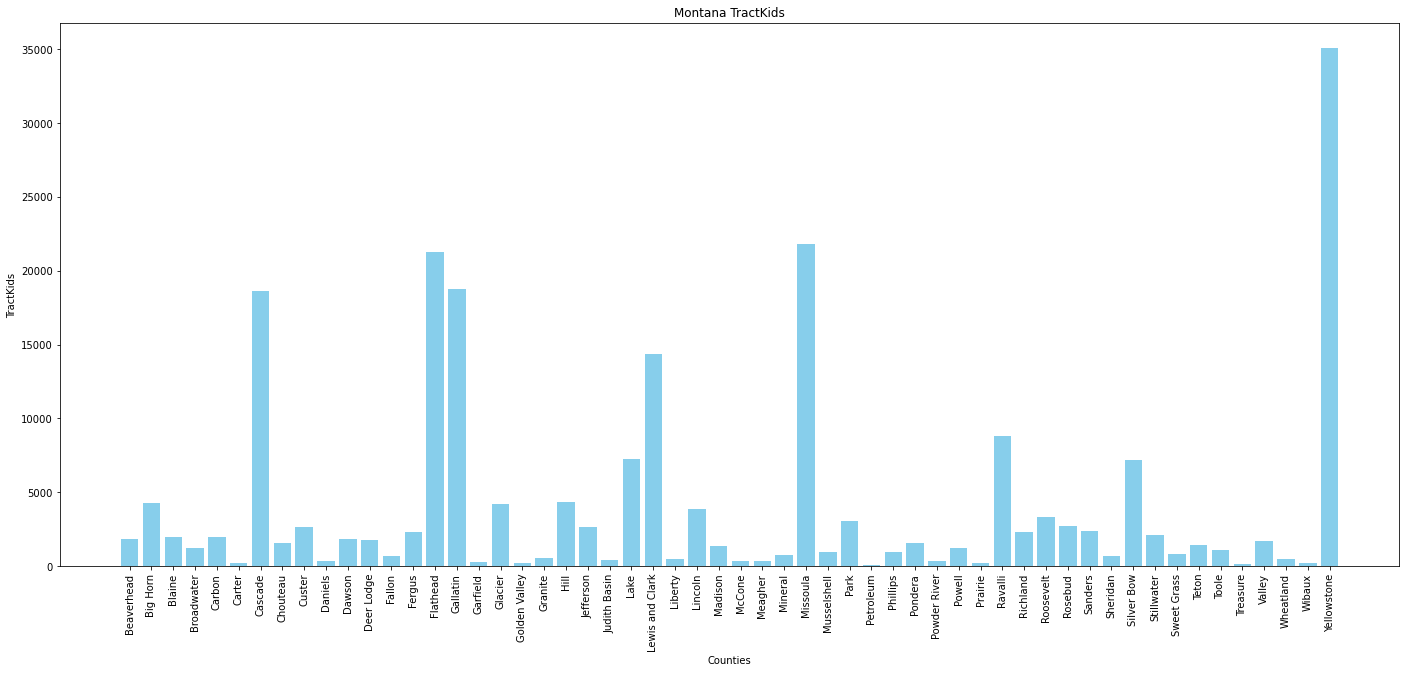

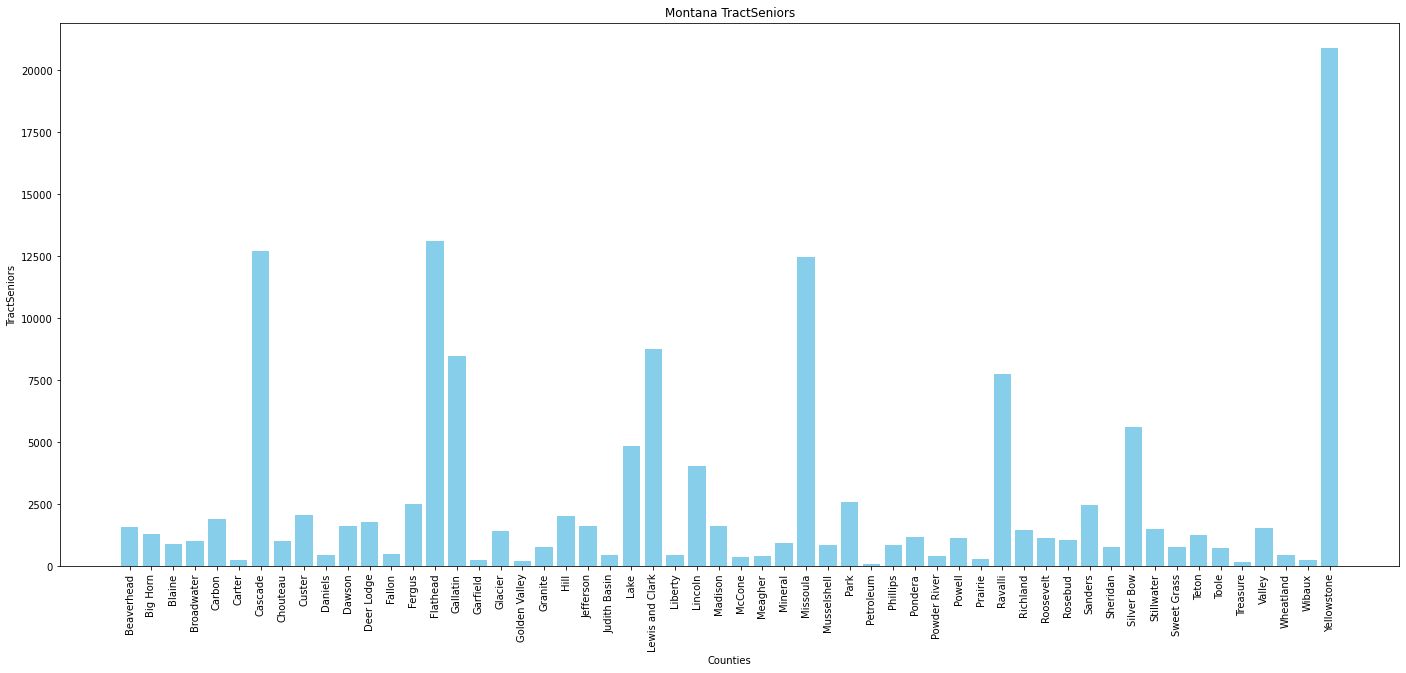

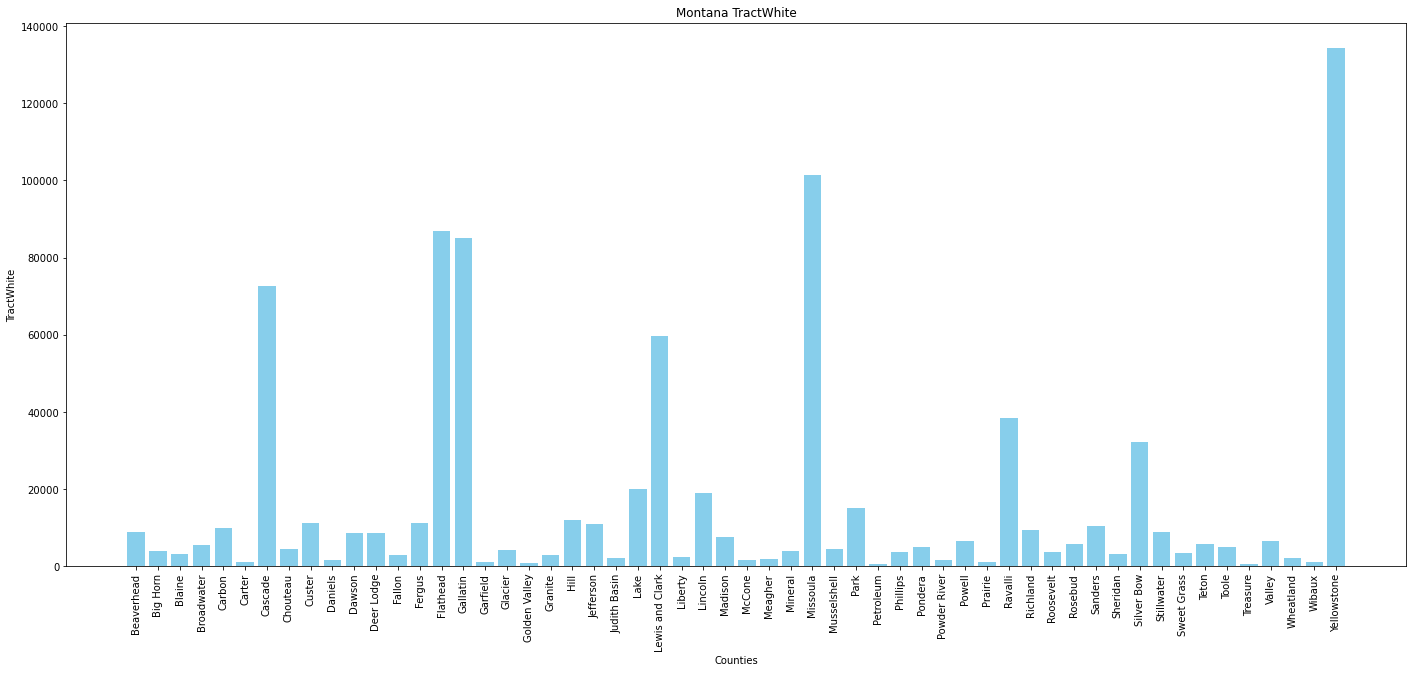

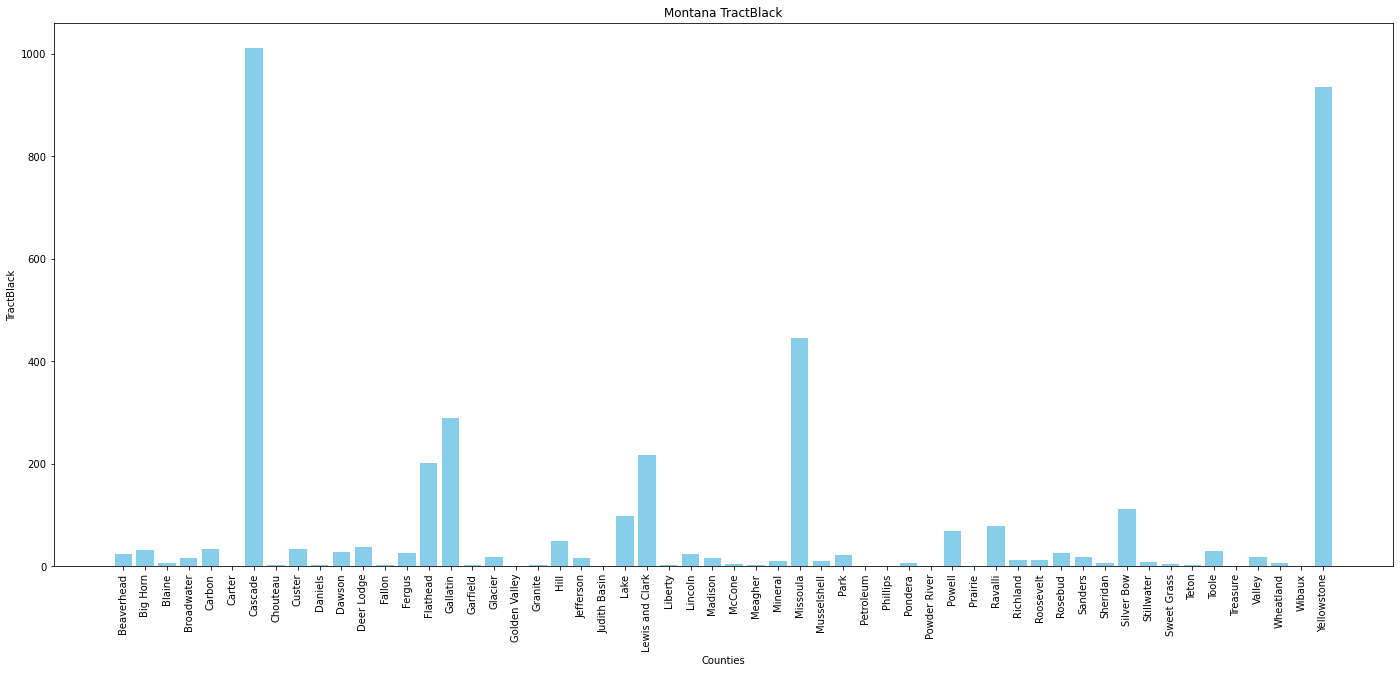

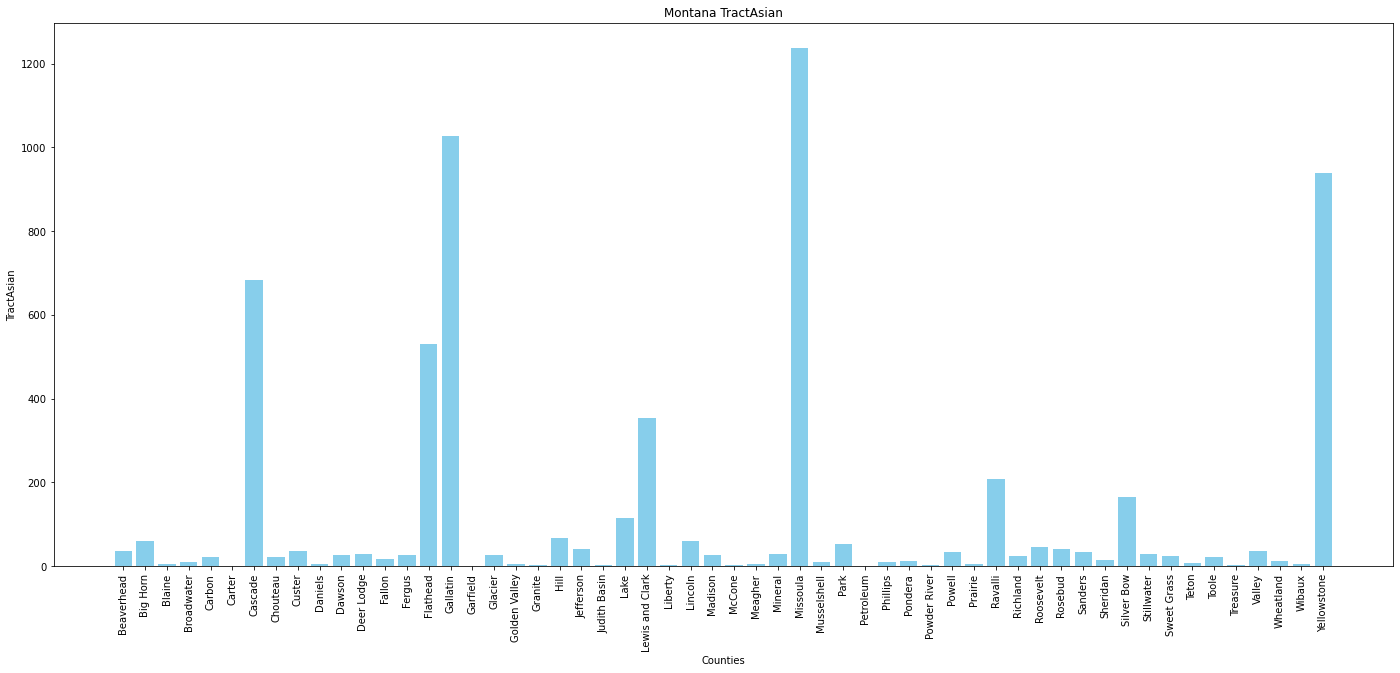

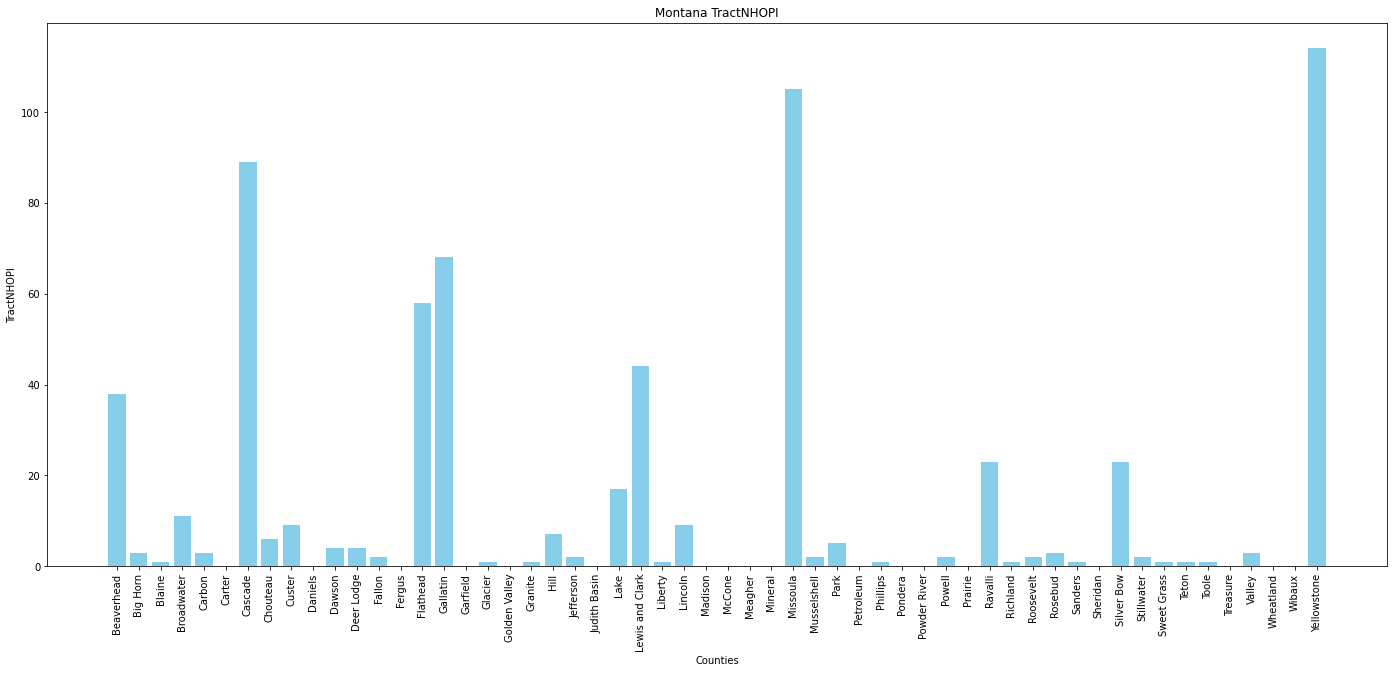

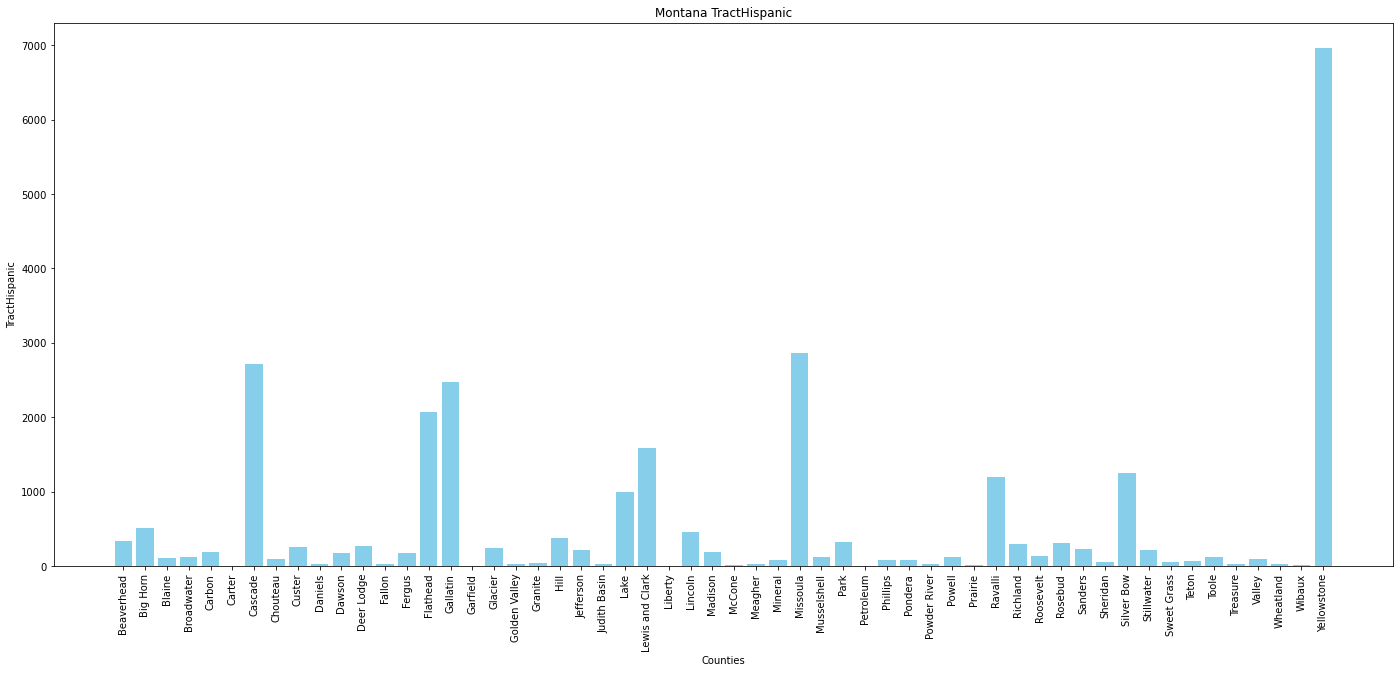

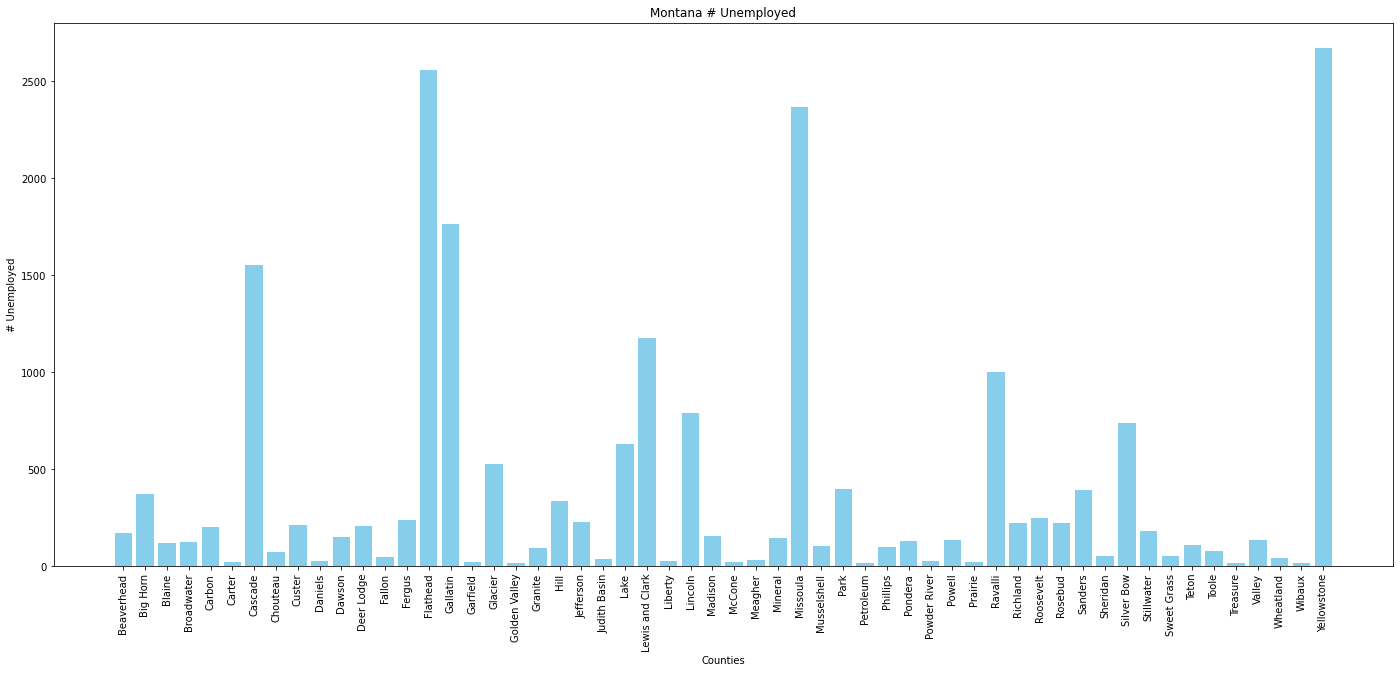

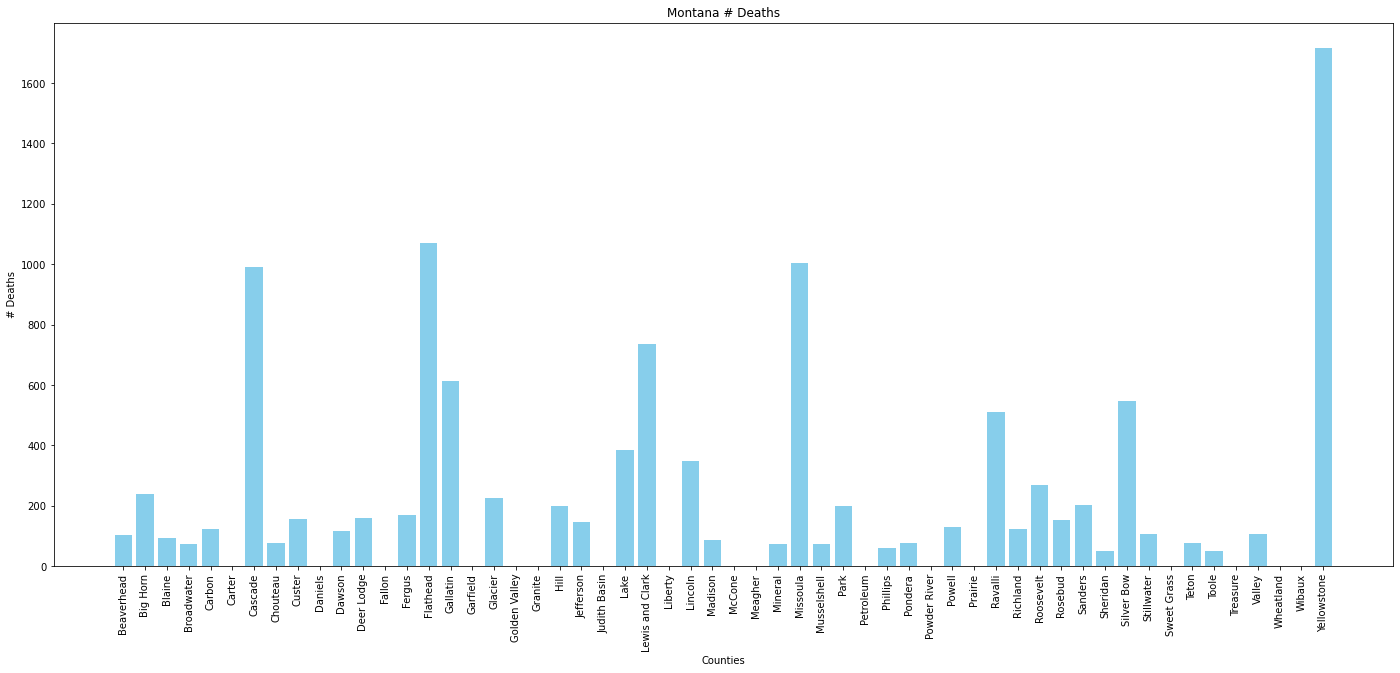

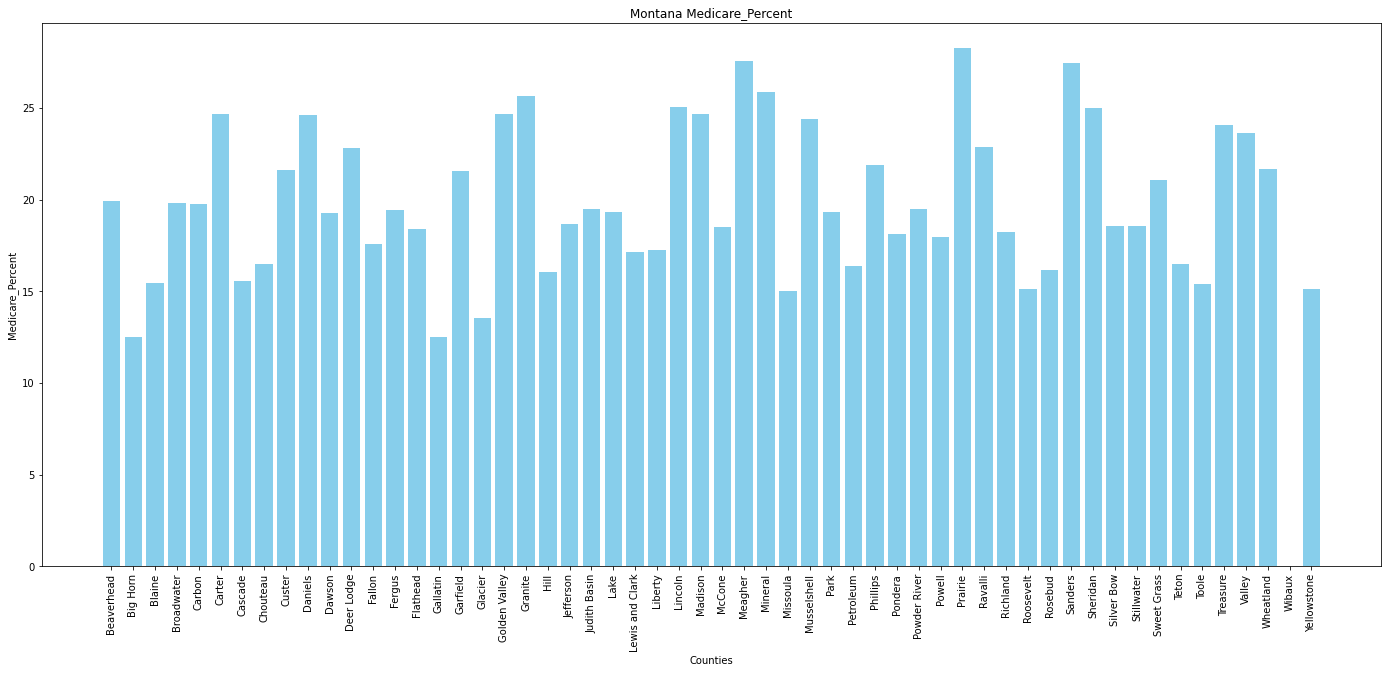

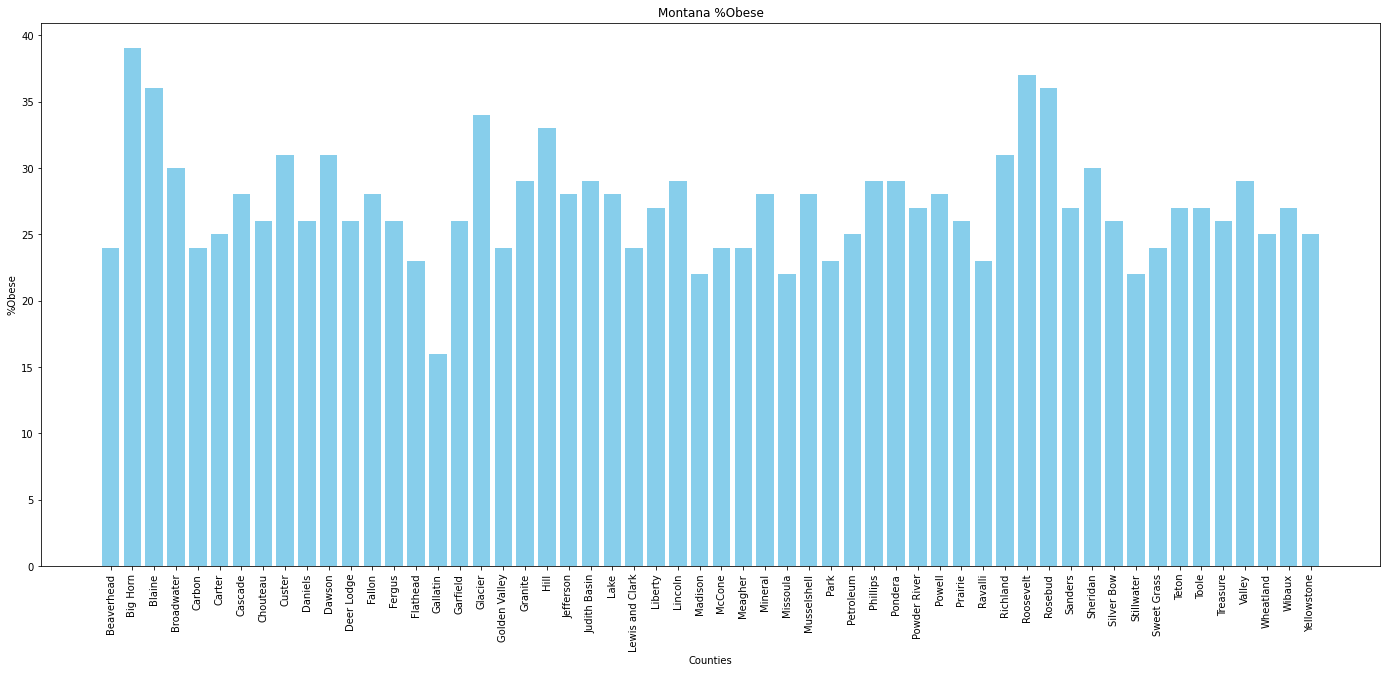

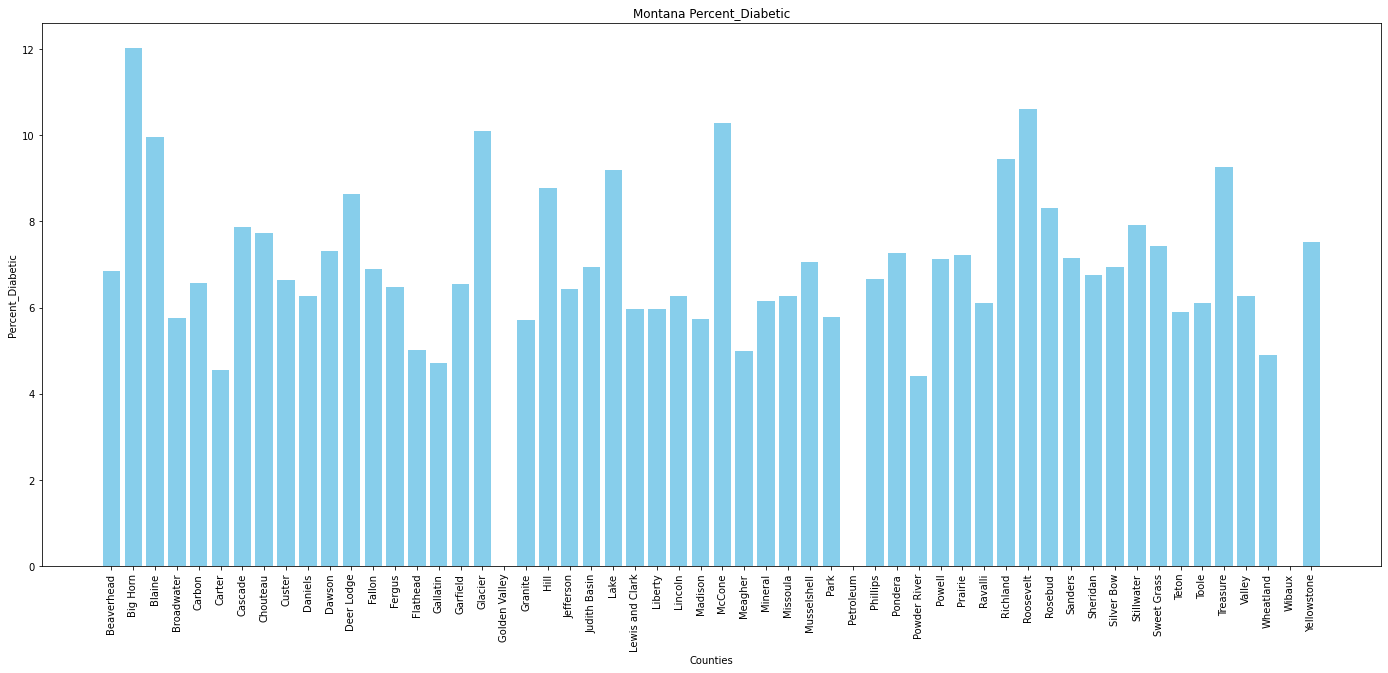

In [8]:
categories = ["POP2010", "OHU2010", "LILATracts_1And10", "LILATracts_halfAnd10", "LILATracts_1And20", 
              "LILATracts_Vehicle", "LAPOP1_10", "LAPOP05_10", "LAPOP1_20", "LALOWI1_10", "LALOWI05_10", 
             "LALOWI1_20", "lapophalf", "TractKids", "TractSeniors", "TractWhite", 
             "TractBlack", "TractAsian", "TractNHOPI", "TractHispanic", "# Unemployed", 
              "# Deaths", "Medicare_Percent", "%Obese", "Percent_Diabetic"]

for category in categories:
    f, ax = plt.subplots(figsize=(24,10))
    y_axis = state[category].tolist()
    plt.bar(x_axis, y_axis, color='skyblue', align='center')
    tick_loc = [value for value in x_axis]
    plt.xticks(tick_loc, counties, rotation=90)
    plt.xlabel("Counties")
    plt.ylabel(category)
    plt.title(f"{the_state} {category}")
    plt.savefig(f'bar_graphs/{the_state}_{category}.png')
    plt.show()

In [4]:
average_df = clean_fuse.groupby("State").agg({"POP2010": "mean", "OHU2010": "mean", "PovertyRate": "mean", 
                                            "MedianFamilyIncome": "mean", "LILATracts_1And10": "mean", 
                                            "LILATracts_halfAnd10": "mean", "LILATracts_1And20": "mean", 
                                             "LILATracts_Vehicle": "mean", "LAPOP1_10": "mean", 
                                            "LAPOP05_10": "mean", "LAPOP1_20": "mean", "LAPOP1_10": "mean", 
                                           "LALOWI1_10": "mean", "LALOWI05_10": "mean", "LALOWI1_20": "mean",
                                           "lapophalf": "mean", "TractKids": "mean", "TractSeniors": "mean",
                                           "TractWhite": "mean", "TractBlack": "mean", "TractAsian": "mean", 
                                           "TractNHOPI": "mean", "TractAIAN": "mean", "TractOMultir": "mean", 
                                           "TractHispanic": "mean", "TractHUNV": "mean", "TractSNAP": "mean", 
                                           "# Deaths": "mean", "Years of Potential Life Lost Rate": "mean", 
                                            "%Obese": "mean", "%Fair_or_Poor": "mean", "# Diabetics": "mean", 
                                               "# Violent Crimes": "mean", "# Unemployed": "mean", 
                                            "% Children in Poverty": "mean", "Medicare_Percent": "mean", 
                                             "Percent_Diabetic": "mean"}).round(0)

average_df




,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,LAPOP1_10,LAPOP05_10,...,# Deaths,Years of Potential Life Lost Rate,%Obese,%Fair_or_Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Medicare_Percent,Percent_Diabetic
State,,,,,,,,,,,,,,,,,,,,,
Alabama,71339.0,28116.0,22.0,47557.0,4.0,6.0,3.0,4.0,17290.0,31453.0,...,1123.0,10481.0,36.0,22.0,1138.0,311.0,1955.0,32.0,16.0,inf
Alaska,29909.0,10875.0,13.0,73552.0,1.0,2.0,1.0,1.0,10149.0,16806.0,...,441.0,8813.0,31.0,16.0,379.0,312.0,962.0,18.0,6.0,inf
Arizona,426134.0,158733.0,21.0,49773.0,17.0,38.0,15.0,17.0,111680.0,257711.0,...,4687.0,8845.0,29.0,20.0,3890.0,1664.0,12879.0,29.0,15.0,9.0
Arkansas,38879.0,15294.0,22.0,45703.0,2.0,3.0,2.0,2.0,9317.0,17280.0,...,595.0,10011.0,36.0,23.0,567.0,186.0,926.0,31.0,18.0,9.0
California,642310.0,216853.0,17.0,67871.0,9.0,38.0,9.0,11.0,85983.0,291401.0,...,5678.0,6351.0,24.0,17.0,4189.0,2665.0,20399.0,22.0,16.0,8.0
Colorado,78581.0,30826.0,14.0,63593.0,3.0,7.0,2.0,2.0,17787.0,44962.0,...,860.0,6664.0,21.0,13.0,510.0,254.0,1716.0,21.0,16.0,inf
Connecticut,446762.0,171386.0,10.0,87501.0,9.0,25.0,9.0,15.0,133155.0,265537.0,...,4029.0,5312.0,26.0,13.0,4264.0,1473.0,13310.0,13.0,14.0,7.0
Delaware,299311.0,114099.0,13.0,68760.0,9.0,18.0,9.0,9.0,76132.0,167024.0,...,3641.0,7384.0,31.0,16.0,6075.0,1583.0,7631.0,20.0,21.0,11.0
Florida,280617.0,110758.0,18.0,53678.0,9.0,19.0,8.0,10.0,72107.0,167138.0,...,3403.0,7943.0,30.0,16.0,3219.0,1377.0,7792.0,27.0,16.0,10.0


In [ ]:
means = ["POP2010", "OHU2010", "LILATracts_1And10", "LILATracts_halfAnd10", "LILATracts_1And20", 
              "LILATracts_Vehicle", "LAPOP1_10", "LAPOP05_10", "LAPOP1_20", "LALOWI1_10", "LALOWI05_10", 
             "LALOWI1_20", "lapophalf", "TractKids", "TractSeniors", "TractWhite", 
             "TractBlack", "TractAsian", "TractNHOPI", "TractHispanic", "# Unemployed", 
              "# Deaths", "Original Medicare"]

states = average_df.index.values.tolist()
x_axis = np.arange(len(states))

for mean in means:
    f, ax = plt.subplots(figsize=(24,10))
    y_axis = average_df[mean].tolist()
    plt.bar(x_axis, y_axis, color='red', align='center')
    tick_loc = [value for value in x_axis]
    plt.xticks(tick_loc, states, rotation=90)
    plt.xlabel("States")
    plt.ylabel(mean)
    plt.title(f"National average {mean}")
    plt.savefig(f'bar_graphs/national_avg_{mean}.png')
    plt.show()

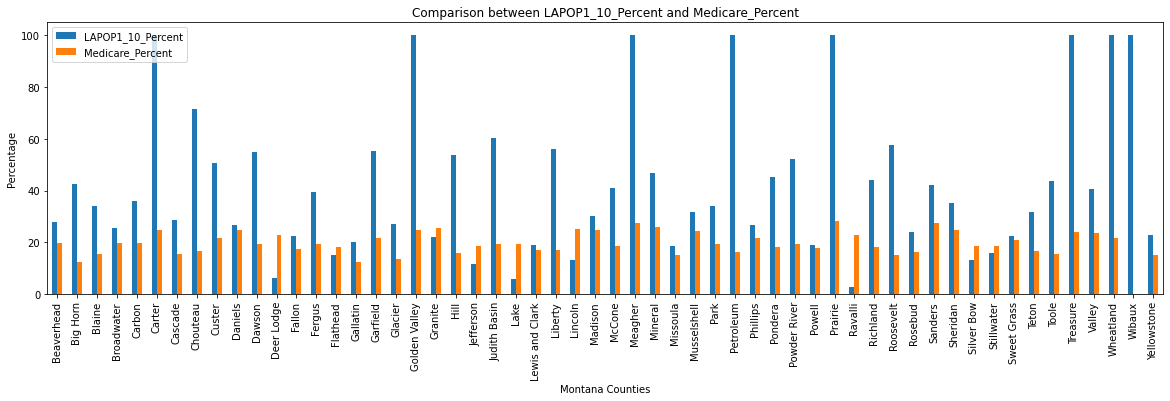

Ttest_indResult(statistic=5.986240353464501, pvalue=1.4219763004578835e-07)


<Figure size 432x288 with 0 Axes>

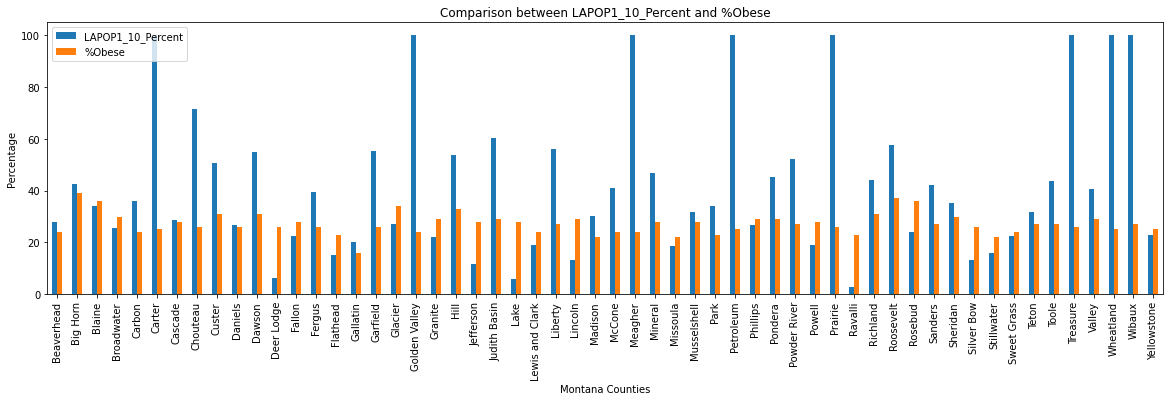

Ttest_indResult(statistic=3.9727960315089104, pvalue=0.00020085409712895187)


<Figure size 432x288 with 0 Axes>

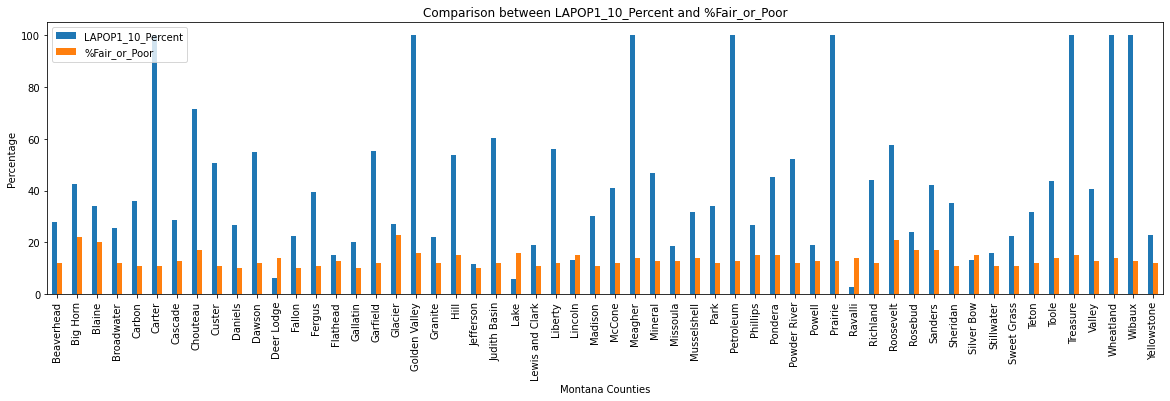

Ttest_indResult(statistic=7.654535657114768, pvalue=2.814965738026913e-10)


<Figure size 432x288 with 0 Axes>

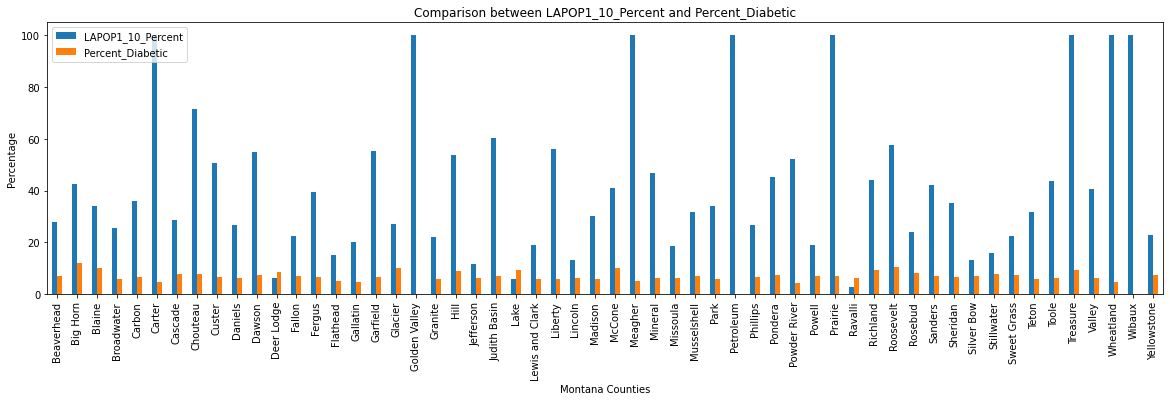

Ttest_indResult(statistic=nan, pvalue=nan)


<Figure size 432x288 with 0 Axes>

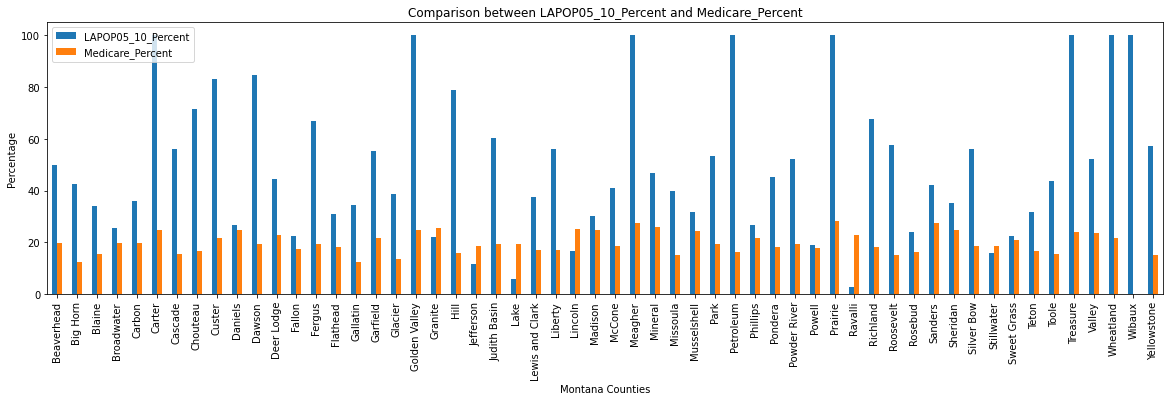

Ttest_indResult(statistic=8.154603943764728, pvalue=3.235743858863374e-11)


<Figure size 432x288 with 0 Axes>

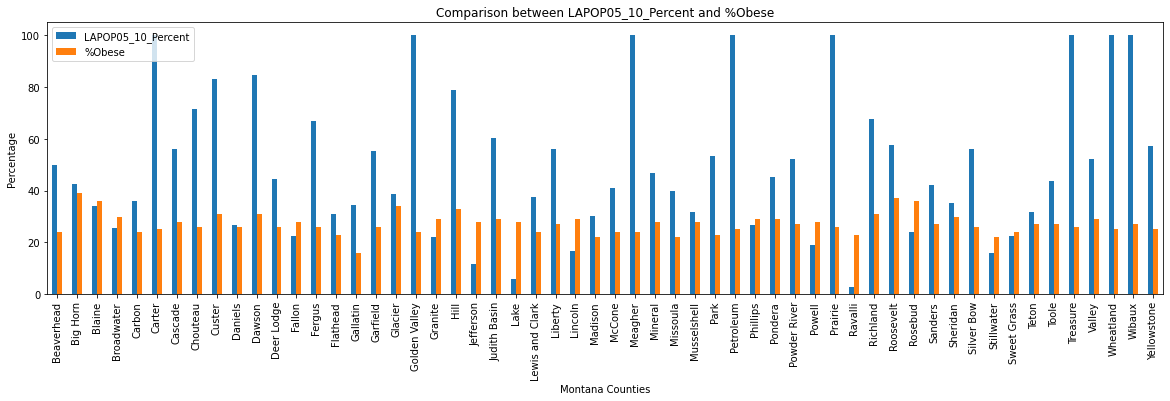

Ttest_indResult(statistic=6.099842198508827, pvalue=9.616289587523426e-08)


<Figure size 432x288 with 0 Axes>

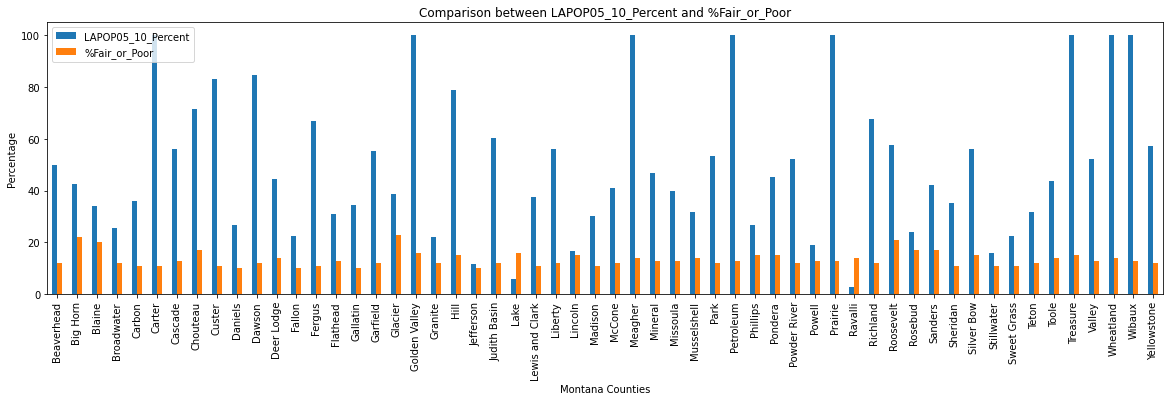

Ttest_indResult(statistic=9.887223901123326, pvalue=6.578420441503284e-14)


<Figure size 432x288 with 0 Axes>

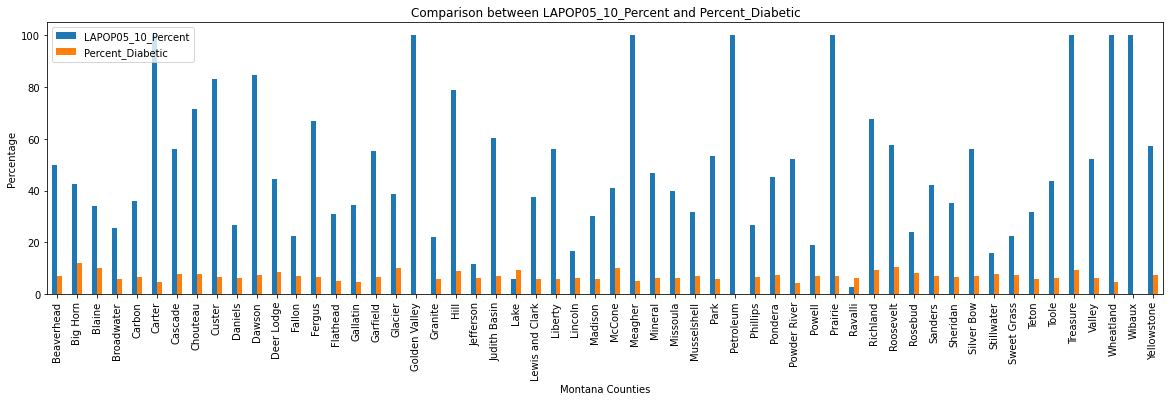

Ttest_indResult(statistic=nan, pvalue=nan)


<Figure size 432x288 with 0 Axes>

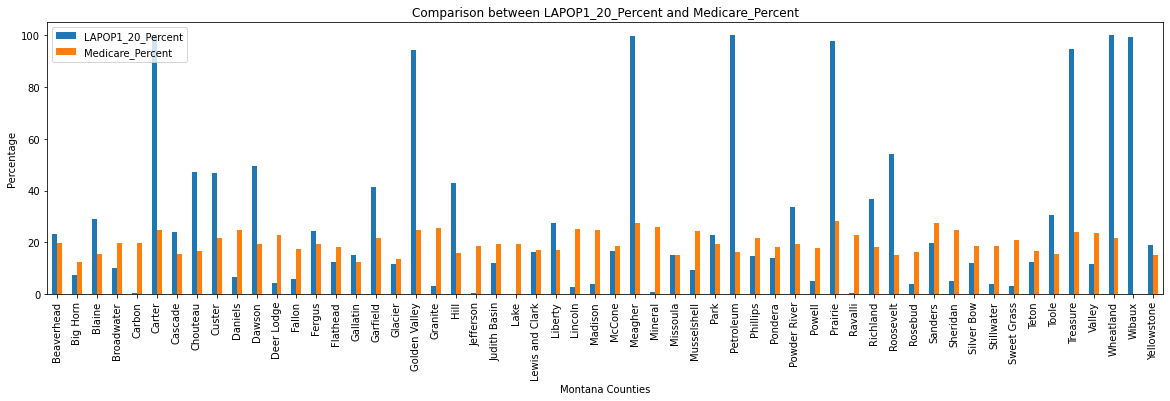

Ttest_indResult(statistic=2.0952513817867064, pvalue=0.04056550972488852)


<Figure size 432x288 with 0 Axes>

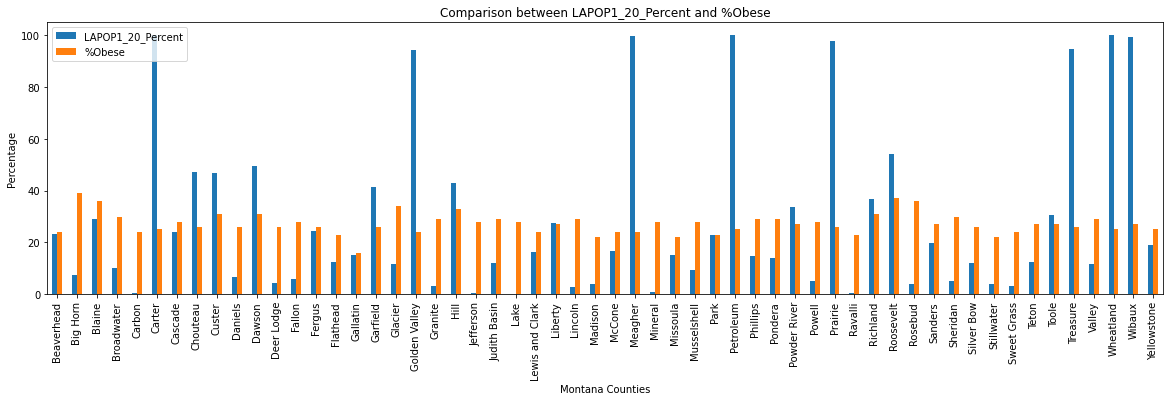

Ttest_indResult(statistic=0.30341557678264625, pvalue=0.7626816430873669)


<Figure size 432x288 with 0 Axes>

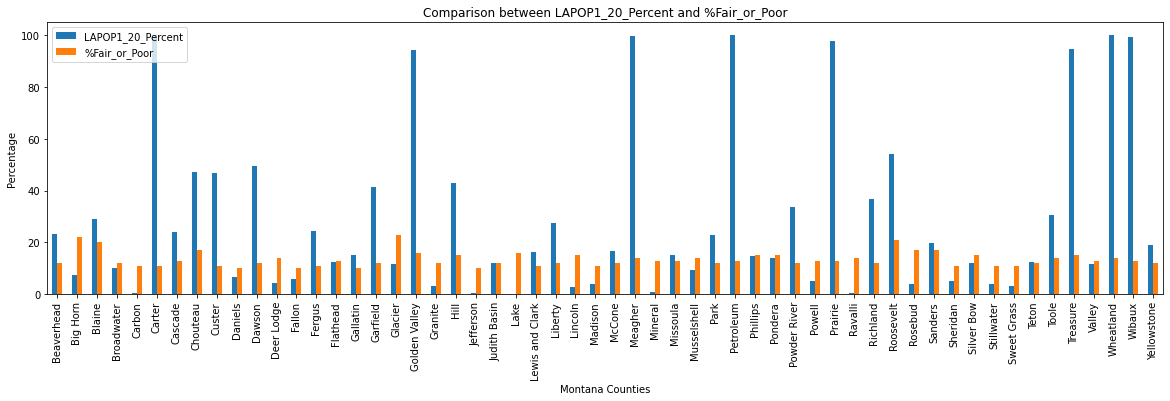

Ttest_indResult(statistic=3.533802051836089, pvalue=0.0008301059989672828)


<Figure size 432x288 with 0 Axes>

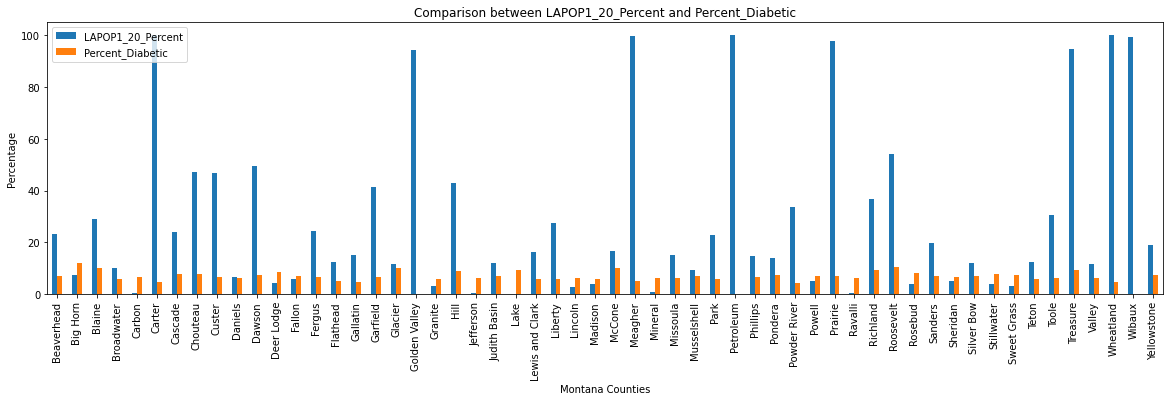

Ttest_indResult(statistic=nan, pvalue=nan)


<Figure size 432x288 with 0 Axes>

In [5]:
#For loop for comparison graphs

x_lines = ["LAPOP1_10_Percent", "LAPOP05_10_Percent", "LAPOP1_20_Percent", ]
y_lines = ["Medicare_Percent", "%Obese", "%Fair_or_Poor", "Percent_Diabetic"]
betwixt = []
p_val = []

for x_line in x_lines:
    for y_line in y_lines:
        comparison = state[["County", x_line, y_line]]
        compare_plot = comparison.plot(kind="bar", figsize=(20,5))
        compare_plot.set_xticklabels(comparison["County"], rotation=90)
        plt.ylabel("Percentage")
        plt.xlabel(f"{the_state} Counties")
        the_titles = plt.title(f"Comparison between {x_line} and {y_line}")
        #plt.savefig(f'comparison_bars/{x_line}_and_{y_line}.png')
        plt.show()
        plt.tight_layout()
        x_var = comparison[x_line]
        y_var = comparison[y_line]
        print(stats.ttest_ind(x_var, y_var, equal_var=False))
        #pvalue = Ttest_indResult[pvalue]
        
        #if pvalue < 0.05:
            #betwixt.append(the_titles)
            #p_val.append(pvalue)

In [ ]:
#Statistically significant comparisons

#Low access pop 1-10 and medicare percent
#Low access pop 1-10 and obese percent
#low access pop 1-10 and %Fair or Poor

#low access pop 0.5-10 and medicare percent
#Low access pop 0.5-10 and obese percent
#Low access pop 0.5-10 and %Fair or Poor

#Low access pop 1-20 and medicare percent
#low access pop 1-20 and %Fair or Poor

#According to the bar graphs, there seems to be a relationship between obesity and the low access populations between
#half a mile (urban) from supermarket and 10 miles (rural).

#There also seems to be a similar relationship between the fair/poor % and half a mile from supermarkets (urban)
#up to 20 miles from supermarkets (rural).

#As for diabetics, there doesn't seem to be a relationship between the diabetic population and the food desert
#population.

In [ ]:
food_desert = 